<h2>Import Required Libraries</h2>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as datetime
from datetime import timedelta

from pandas_profiling import ProfileReport

<h2>Import Data into df</h2>

In [2]:
rdata = pd.read_csv('ridedata.csv')

In [3]:
rdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BCC66FC6FAB27CC7,electric_bike,2022-11-10 06:21:55,2022-11-10 06:31:27,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879401,-87.639848,41.894345,-87.622798,member
1,772AB67E902C180F,classic_bike,2022-11-04 07:31:55,2022-11-04 07:46:25,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879255,-87.639904,41.894345,-87.622798,member
2,585EAD07FDEC0152,classic_bike,2022-11-21 17:20:29,2022-11-21 17:34:36,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member
3,91C4E7ED3C262FF9,classic_bike,2022-11-25 17:29:34,2022-11-25 17:45:15,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member
4,709206A3104CABC8,classic_bike,2022-11-29 17:24:25,2022-11-29 17:42:51,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member


In [4]:
profile = ProfileReport(rdata, title="Pandas Profiling Report")

In [6]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337735 entries, 0 to 337734
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             337735 non-null  object 
 1   rideable_type       337735 non-null  object 
 2   started_at          337735 non-null  object 
 3   ended_at            337735 non-null  object 
 4   start_station_name  285778 non-null  object 
 5   start_station_id    285778 non-null  object 
 6   end_station_name    283476 non-null  object 
 7   end_station_id      283476 non-null  object 
 8   start_lat           337735 non-null  float64
 9   start_lng           337735 non-null  float64
 10  end_lat             337505 non-null  float64
 11  end_lng             337505 non-null  float64
 12  member_casual       337735 non-null  object 
dtypes: float64(4), object(9)
memory usage: 33.5+ MB


In [5]:
rdata.describe()

,start_lat,start_lng,end_lat,end_lng
count,337735.000000,337735.000000,337505.000000,337505.000000
mean,41.899263,-87.648119,41.898558,-87.646246
std,0.048107,0.028927,0.209618,0.427704
min,41.648501,-87.840000,0.000000,-87.840000
25%,41.879206,-87.662383,41.879255,-87.663600
50%,41.895748,-87.644448,41.895769,-87.645143
75%,41.929546,-87.630000,41.929567,-87.630000
max,42.070000,-87.520000,42.080000,0.000000


In [6]:
rdata.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    51957
start_station_id      51957
end_station_name      54259
end_station_id        54259
start_lat                 0
start_lng                 0
end_lat                 230
end_lng                 230
member_casual             0
dtype: int64

<AxesSubplot:xlabel='member_casual', ylabel='count'>

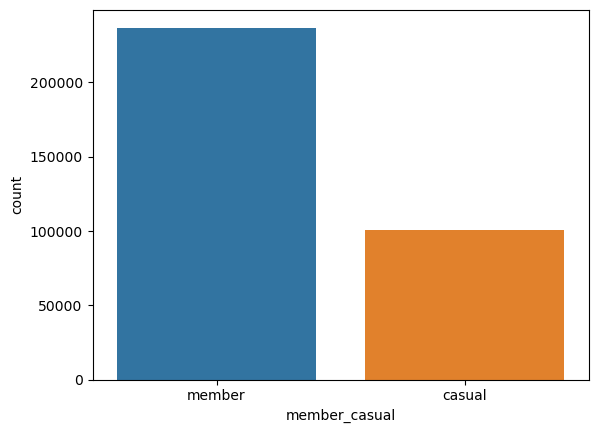

In [7]:
sns.countplot(x=rdata['member_casual'])

<h2> Dropping null values </h2>

In [8]:
rdata.dropna(axis=0, inplace = True)

In [9]:
rdata.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

<h2>Converting Start and End to datetime dtype</h2>

In [10]:
rdata['started_at'] = pd.to_datetime(rdata['started_at'], dayfirst = True)
rdata['ended_at'] = pd.to_datetime(rdata['ended_at'], dayfirst = True)

In [11]:
rdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255794 entries, 0 to 337734
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             255794 non-null  object        
 1   rideable_type       255794 non-null  object        
 2   started_at          255794 non-null  datetime64[ns]
 3   ended_at            255794 non-null  datetime64[ns]
 4   start_station_name  255794 non-null  object        
 5   start_station_id    255794 non-null  object        
 6   end_station_name    255794 non-null  object        
 7   end_station_id      255794 non-null  object        
 8   start_lat           255794 non-null  float64       
 9   start_lng           255794 non-null  float64       
 10  end_lat             255794 non-null  float64       
 11  end_lng             255794 non-null  float64       
 12  member_casual       255794 non-null  object        
dtypes: datetime64[ns](2), float64

In [12]:
rdata['started_at'].head()

0   2022-11-10 06:21:55
1   2022-11-04 07:31:55
2   2022-11-21 17:20:29
3   2022-11-25 17:29:34
4   2022-11-29 17:24:25
Name: started_at, dtype: datetime64[ns]

<h2> Separate Hour/Day/Month </h2>

In [13]:
rdata['Hour'] = rdata.started_at.apply(lambda x: x.hour)
rdata['Day'] = rdata.started_at.apply(lambda x: x.day_name())  
rdata['Month'] = rdata.started_at.apply(lambda x: x.month)

In [14]:
rdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Hour,Day,Month
0,BCC66FC6FAB27CC7,electric_bike,2022-11-10 06:21:55,2022-11-10 06:31:27,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879401,-87.639848,41.894345,-87.622798,member,6,Thursday,11
1,772AB67E902C180F,classic_bike,2022-11-04 07:31:55,2022-11-04 07:46:25,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879255,-87.639904,41.894345,-87.622798,member,7,Friday,11
2,585EAD07FDEC0152,classic_bike,2022-11-21 17:20:29,2022-11-21 17:34:36,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,17,Monday,11
3,91C4E7ED3C262FF9,classic_bike,2022-11-25 17:29:34,2022-11-25 17:45:15,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,17,Friday,11
4,709206A3104CABC8,classic_bike,2022-11-29 17:24:25,2022-11-29 17:42:51,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,17,Tuesday,11


<h2> Calculate Ride TIme </h2>

In [15]:
rdata['Total_Ride_Time'] = (rdata['ended_at'] - rdata['started_at'])

In [16]:
rdata['Total_Ride_Time'] = (rdata['Total_Ride_Time'])/timedelta(minutes=1)
rdata['Total_Ride_Time'] = rdata['Total_Ride_Time'].round(decimals = 1)

In [17]:
rdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Hour,Day,Month,Total_Ride_Time
0,BCC66FC6FAB27CC7,electric_bike,2022-11-10 06:21:55,2022-11-10 06:31:27,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879401,-87.639848,41.894345,-87.622798,member,6,Thursday,11,9.5
1,772AB67E902C180F,classic_bike,2022-11-04 07:31:55,2022-11-04 07:46:25,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879255,-87.639904,41.894345,-87.622798,member,7,Friday,11,14.5
2,585EAD07FDEC0152,classic_bike,2022-11-21 17:20:29,2022-11-21 17:34:36,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,17,Monday,11,14.1
3,91C4E7ED3C262FF9,classic_bike,2022-11-25 17:29:34,2022-11-25 17:45:15,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,17,Friday,11,15.7
4,709206A3104CABC8,classic_bike,2022-11-29 17:24:25,2022-11-29 17:42:51,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,17,Tuesday,11,18.4


<h2> Calculate Distance Traveled </h2>

In [18]:
rdata['Lat'] = (rdata['end_lat'] - rdata['start_lat'])
rdata['Lng'] = (rdata['end_lng']) - rdata['start_lng']

In [19]:
rdata['Distance'] = np.sqrt((rdata['Lat']** 2) + (rdata['Lng'] ** 2))

In [20]:
rdata['Distance'] = rdata['Distance'] * 111

In [21]:
rdata['Distance'].head()

0    2.516559
1    2.531954
2    2.936866
3    2.936866
4    2.936866
Name: Distance, dtype: float64

In [22]:
rdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Hour,Day,Month,Total_Ride_Time,Lat,Lng,Distance
0,BCC66FC6FAB27CC7,electric_bike,2022-11-10 06:21:55,2022-11-10 06:31:27,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879401,-87.639848,41.894345,-87.622798,member,6,Thursday,11,9.5,0.014944,0.017049,2.516559
1,772AB67E902C180F,classic_bike,2022-11-04 07:31:55,2022-11-04 07:46:25,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879255,-87.639904,41.894345,-87.622798,member,7,Friday,11,14.5,0.015090,0.017106,2.531954
2,585EAD07FDEC0152,classic_bike,2022-11-21 17:20:29,2022-11-21 17:34:36,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,17,Monday,11,14.1,0.026457,0.000243,2.936866
3,91C4E7ED3C262FF9,classic_bike,2022-11-25 17:29:34,2022-11-25 17:45:15,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,17,Friday,11,15.7,0.026457,0.000243,2.936866
4,709206A3104CABC8,classic_bike,2022-11-29 17:24:25,2022-11-29 17:42:51,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,17,Tuesday,11,18.4,0.026457,0.000243,2.936866


In [23]:
rdata['Distance'] = rdata['Distance'].round(decimals = 2)

In [24]:
rdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Hour,Day,Month,Total_Ride_Time,Lat,Lng,Distance
0,BCC66FC6FAB27CC7,electric_bike,2022-11-10 06:21:55,2022-11-10 06:31:27,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879401,-87.639848,41.894345,-87.622798,member,6,Thursday,11,9.5,0.014944,0.017049,2.52
1,772AB67E902C180F,classic_bike,2022-11-04 07:31:55,2022-11-04 07:46:25,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879255,-87.639904,41.894345,-87.622798,member,7,Friday,11,14.5,0.015090,0.017106,2.53
2,585EAD07FDEC0152,classic_bike,2022-11-21 17:20:29,2022-11-21 17:34:36,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,17,Monday,11,14.1,0.026457,0.000243,2.94
3,91C4E7ED3C262FF9,classic_bike,2022-11-25 17:29:34,2022-11-25 17:45:15,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,17,Friday,11,15.7,0.026457,0.000243,2.94
4,709206A3104CABC8,classic_bike,2022-11-29 17:24:25,2022-11-29 17:42:51,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,17,Tuesday,11,18.4,0.026457,0.000243,2.94


In [25]:
month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [26]:
rdata['Month_Name'] = rdata['Month'].map(month)

In [27]:
rdata['Month_Name'].head()

0    November
1    November
2    November
3    November
4    November
Name: Month_Name, dtype: object

<AxesSubplot:xlabel='member_casual', ylabel='Distance'>

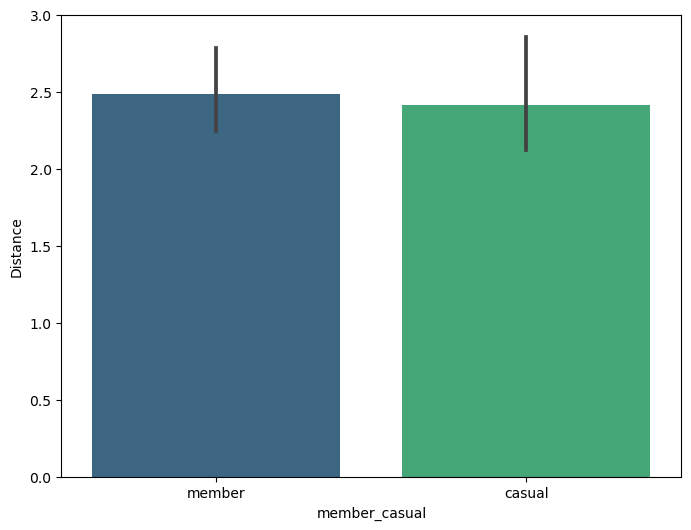

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(x='member_casual', y='Distance', data=rdata, palette='viridis')

<AxesSubplot:xlabel='member_casual', ylabel='Total_Ride_Time'>

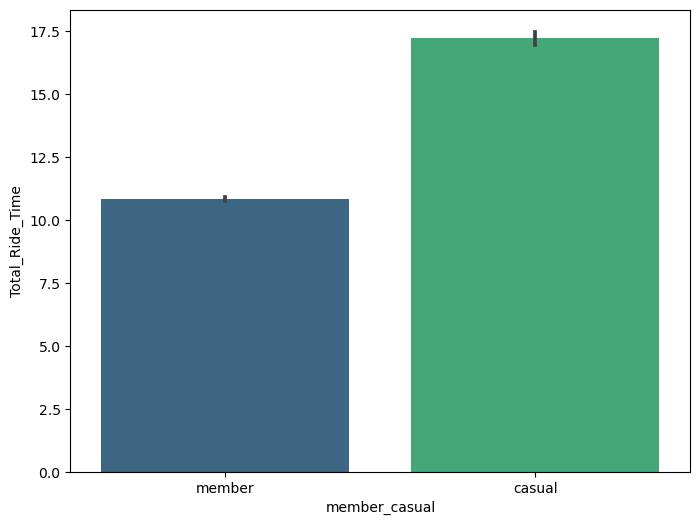

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x='member_casual', y='Total_Ride_Time', data=rdata, palette='viridis')

<h3>Members have shorter rides based on duration but travel further distances</h3>

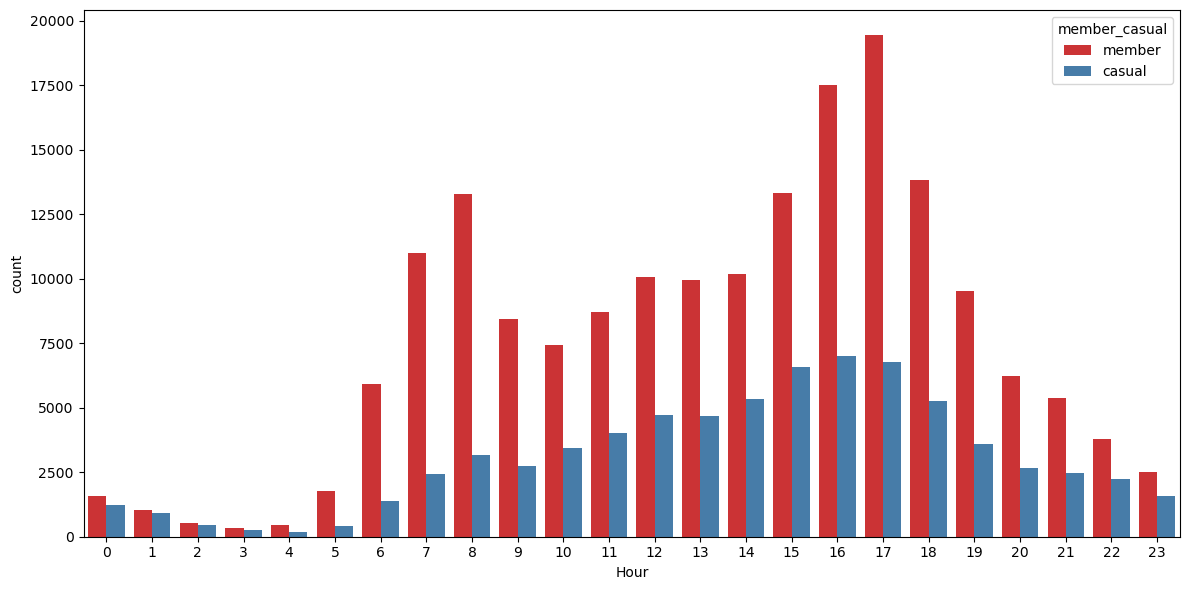

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', hue='member_casual', data=rdata, palette='Set1')
plt.tight_layout()

<h3>Afternoon more popular for riding, most likely due to work.</h3>

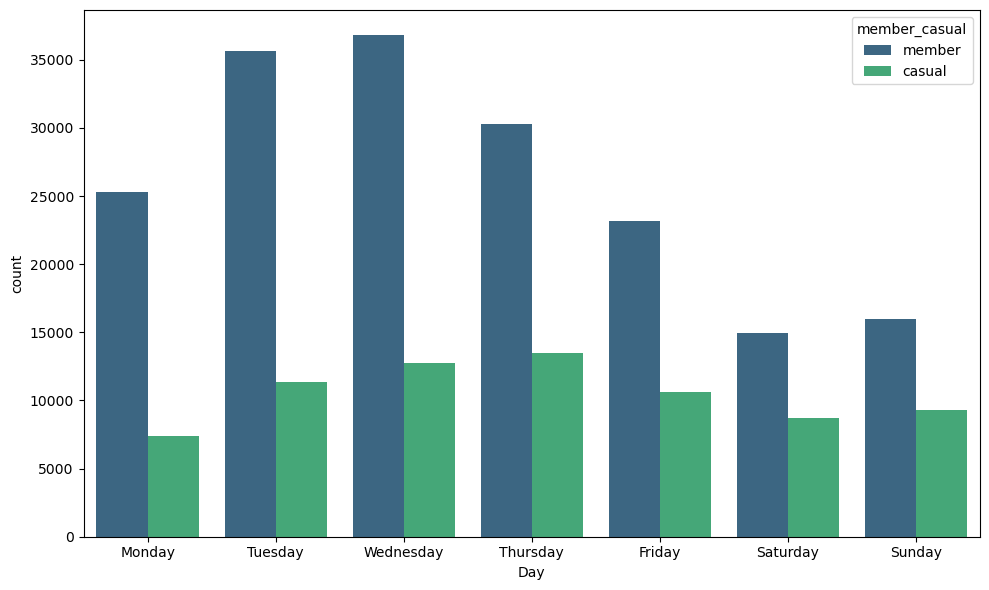

In [31]:
plt.figure(figsize=(10,6))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='Day', hue='member_casual', data=rdata, palette='viridis', order=order)
plt.tight_layout()

<h3>Members consistantly riding throughout the week and slowing down on weekends, casuals seem pretty consistent.</h3>